# GR_021 Final Project

# Group Members <font color='black'></font>

 - A14270602
 - A11302458
 - A11406784
 - A11745836
 - A10517355

# Introduction <font color='black'></font>



As the legalization of marijuana has only occurred relatively recently in various places across the US, data on how it has affected the market is scarce. We as a group are interested in analyzing the changes in street cost of marijuana over time and how they may have come about as a result of passing legalization or decriminalization laws within states.


# Research Question <font color='black'></font>


Has there been a change in street prices of marijuana since its decriminalization or legalization for medicinal purposes within a state? 


# Hypothesis <font color='black'></font>


We estimate that the legal status of marijuana use in a state is correlated with its street price, so that after pro-marijuana legislation is passed in a state the street price will go down.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [2]:
data_original = pd.read_csv('http://blog.yhat.com/static/misc/data/marijuana-street-price-clean.csv')

In [3]:
data = data_original
data
#Data loaded in with all 22899 rows x 8 columns of our original data.
#This keeps our original structure available for later use if needed

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01
5,Colorado,236.31,2161,195.29,1728,213.50,128,2014-01-01
6,Connecticut,347.90,1294,273.97,1316,257.36,91,2014-01-01
7,Delaware,373.18,347,226.25,273,199.88,34,2014-01-01
8,District of Columbia,352.26,433,295.67,349,213.72,39,2014-01-01
9,Florida,306.43,6506,220.03,5237,158.26,514,2014-01-01


In [4]:
data.dropna(inplace=True)

In [5]:
data

#Droping NaN, now 12342 rows x 8 columns.

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01
5,Colorado,236.31,2161,195.29,1728,213.50,128,2014-01-01
6,Connecticut,347.90,1294,273.97,1316,257.36,91,2014-01-01
7,Delaware,373.18,347,226.25,273,199.88,34,2014-01-01
8,District of Columbia,352.26,433,295.67,349,213.72,39,2014-01-01
9,Florida,306.43,6506,220.03,5237,158.26,514,2014-01-01


In [6]:
data.sort_values(by='date')

#Sorted by date to check range of dates

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
20144,Wyoming,355.90,93,378.95,134,161.30,11,2013-12-27
20122,North Dakota,415.70,134,361.62,198,269.55,13,2013-12-27
20123,Ohio,336.70,3039,211.49,2793,168.72,398,2013-12-27
20124,Oklahoma,362.53,748,227.27,660,119.61,128,2013-12-27
20125,Oregon,213.54,1606,188.36,1329,175.87,61,2013-12-27
20126,Maryland,380.08,1954,248.50,1534,197.82,150,2013-12-27
20127,Massachusetts,355.03,2867,297.05,2455,218.37,218,2013-12-27
20128,Michigan,299.31,3035,277.59,2517,227.25,229,2013-12-27
20129,Minnesota,370.92,1703,280.47,1525,179.36,100,2013-12-27
20130,Mississippi,339.66,407,150.44,349,138.66,93,2013-12-27


In [7]:
data.columns = ['State','HighQ Currency Profit','HighQ Ounces Sold','MediumQ Currency Profit','MediumQ Ounces Sold','LowQ Currency Profit','LowQ Ounces Sold','Date']

#Created a new Series with more ideal column names and assigned it to our dataframe column names

In [8]:
data.columns

#Quickly check our new column names 

Index(['State', 'HighQ Currency Profit', 'HighQ Ounces Sold',
       'MediumQ Currency Profit', 'MediumQ Ounces Sold',
       'LowQ Currency Profit', 'LowQ Ounces Sold', 'Date'],
      dtype='object')

In [9]:
data.head()

#Quick preview our new dataframe format

,State,HighQ Currency Profit,HighQ Ounces Sold,MediumQ Currency Profit,MediumQ Ounces Sold,LowQ Currency Profit,LowQ Ounces Sold,Date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [10]:
data = data.sort_values(['State', 'Date'])

#We are now reorganizing our data to be by state and by date per state

In [11]:
data['Date'] = pd.to_datetime(data.Date)

#changed the data type of the datecolumn to better work with it

In [12]:
#In this section we're going to make some sub data frames for more specific analysis

dataCurrency = data[['State', 'HighQ Currency Profit', 'MediumQ Currency Profit', 'LowQ Currency Profit', 'Date']]
dataOunces = data[['State', 'HighQ Ounces Sold', 'MediumQ Ounces Sold', 'LowQ Ounces Sold', 'Date']]
dataHigh = data[['State', 'HighQ Currency Profit', 'HighQ Ounces Sold', 'Date']]
dataMedium = data[['State', 'MediumQ Currency Profit', 'MediumQ Ounces Sold', 'Date']]
dataLow = data[['State', 'LowQ Currency Profit', 'LowQ Ounces Sold', 'Date']]

#dataCurrency.head()
#dataOunces.head()
#dataHigh.head()
#dataMedium.head()
#dataLow.head()

#Ran each individually to ensure correct format

In [13]:
data.dtypes

#Checking the data types to ensure we are ready for some analysis

State                              object
HighQ Currency Profit             float64
HighQ Ounces Sold                   int64
MediumQ Currency Profit           float64
MediumQ Ounces Sold                 int64
LowQ Currency Profit              float64
LowQ Ounces Sold                    int64
Date                       datetime64[ns]
dtype: object

In [14]:
states = []
states = data.State.unique()

In [15]:
alabamaDatabase = data.loc[data['State'] == 'Alabama', :]
alaskaDatabase = data.loc[data['State'] == 'Alaska', :]
arizonaDatabase = data.loc[data['State'] == 'Arizona', :]
arkansasDatabase = data.loc[data['State'] == 'Arkansas', :]
californiaDatabase = data.loc[data['State'] == 'California', :]
coloradoDatabase = data.loc[data['State'] == 'Colorado', :]
connecticutDatabase = data.loc[data['State'] == 'Connecticut', :]
delawareDatabase = data.loc[data['State'] == 'Delaware', :]
districtOfColumbiaDatabase = data.loc[data['State'] == 'District of Columbia', :]
floridaDatabase = data.loc[data['State'] == 'Florida', :]
georgiaDatabase = data.loc[data['State'] == 'Georgia', :]
hawaiiDatabase = data.loc[data['State'] == 'Hawaii', :]
idahoDatabase = data.loc[data['State'] == 'Idaho', :]
illinoisDatabase = data.loc[data['State'] == 'Illinois', :]
indianaDatabase = data.loc[data['State'] == 'Indiana', :]
iowaDatabase = data.loc[data['State'] == 'Iowa', :]
kansasDatabase = data.loc[data['State'] == 'Kansas', :]
kentuckyDatabase = data.loc[data['State'] == 'Kentucky', :]
louisianaDatabase = data.loc[data['State'] == 'Louisiana', :]
maineDatabase = data.loc[data['State'] == 'Maine', :]
marylandDatabase = data.loc[data['State'] == 'Maryland', :]
massachusettsDatabase = data.loc[data['State'] == 'Massachusetts', :]
michiganDatabase = data.loc[data['State'] == 'Michigan', :]
minnesotaDatabase = data.loc[data['State'] == 'Minnesota', :]
mississippiDatabase = data.loc[data['State'] == 'Mississippi', :]
missouriDatabase = data.loc[data['State'] == 'Missouri', :]
montanaDatabase = data.loc[data['State'] == 'Montana', :]
nebraskaDatabase = data.loc[data['State'] == 'Nebraska', :]
nevadaDatabase = data.loc[data['State'] == 'Nevada', :]
newHampshireDatabase = data.loc[data['State'] == 'New Hampshire', :]
newJerseyDatabase = data.loc[data['State'] == 'New Jersey', :]
newMexicoDatabase = data.loc[data['State'] == 'New Mexico', :]
newYorkDatabase = data.loc[data['State'] == 'New York', :]
northCarolinaDatabase = data.loc[data['State'] == 'North Carolina', :]
northDakotaDatabase = data.loc[data['State'] == 'North Dakota', :]
ohioDatabase = data.loc[data['State'] == 'Ohio', :]
oklahomaDatabase = data.loc[data['State'] == 'Oklahoma', :]
oregonDatabase = data.loc[data['State'] == 'Oregon', :]
pennsylvaniaDatabase = data.loc[data['State'] == 'Pennsylvania', :]
rhodeIslandDatabase = data.loc[data['State'] == 'Rhode Island', :]
southCarolinaDatabase = data.loc[data['State'] == 'South Carolina', :]
southDakotaDatabase = data.loc[data['State'] == 'South Dakota', :]
tennesseeDatabase = data.loc[data['State'] == 'Tennessee', :]
texasDatabase = data.loc[data['State'] == 'Texas', :]
utahDatabase = data.loc[data['State'] == 'Utah', :]
vermontDatabase = data.loc[data['State'] == 'Vermont', :]
virginiaDatabase = data.loc[data['State'] == 'Virginia', :]
washingtonDatabase = data.loc[data['State'] == 'Washington', :]
westVirginiaDatabase = data.loc[data['State'] == 'West Virginia', :]
wisconsinDatabase = data.loc[data['State'] == 'Wisconsin', :]
wyomingDatabase = data.loc[data['State'] == 'Wyoming', :]


#    alabamaDatabase, alaskaDatabase, arizonaDatabase, arkansasDatabase,
#   californiaDatabase, coloradoDatabase, connecticutDatabase,
#    delawareDatabase, districtOfColumbiaDatabase, floridaDatabase, 
#    georgiaDatabase, hawaiiDatabase, idahoDatabase, illinoisDatabase, 
#    indianaDatabase, iowaDatabase, kansasDatabase, kentuckyDatabase, 
#    louisianaDatabase, maineDatabase, marylandDatabase, massachusettsDatabase,
#    michiganDatabase, minnesotaDatabase, mississippiDatabase, missouriDatabase,
#    montanaDatabase, nebraskaDatabase, nevadaDatabase, newHampshireDatabase, 
#    newJerseyDatabase, newMexicoDatabase, newYorkDatabase, northCarolinaDatabase,
#    northDakotaDatabase, ohioDatabase, oklahomaDatabase, oregonDatabase, 
#    pennsylvaniaDatabase, rhodeIslandDatabase, southCarolinaDatabase, 
#    southDakotaDatabase, tennesseeDatabase, texasDatabase, utahDatabase, 
#    vermontDatabase, virginiaDatabase, washingtonDatabase, westVirginiaDatabase,
#    wisconsinDatabase, wyomingDatabase

#This is all for more direct analysis per state if needed for
#checking other results 

# Plot Charts for visual representation: <font color='black'></font>

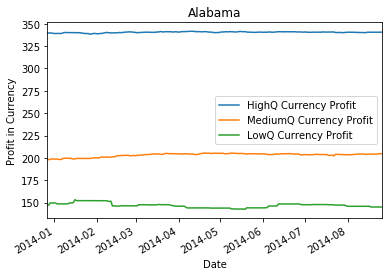

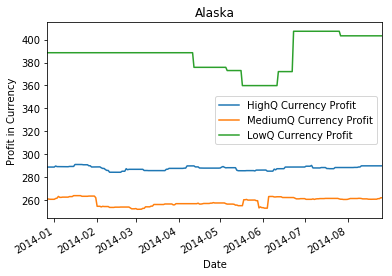

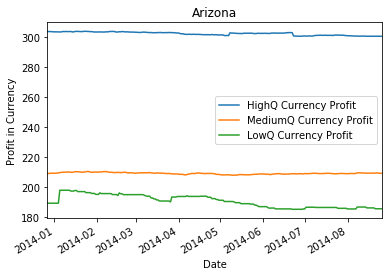

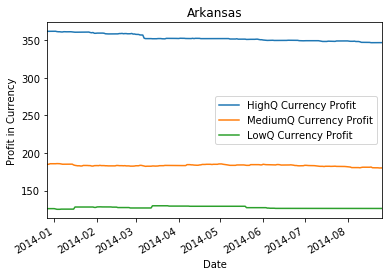

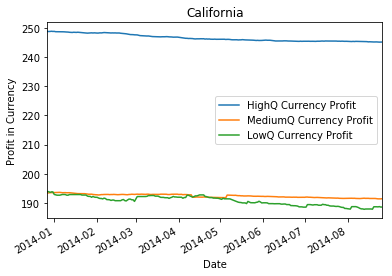

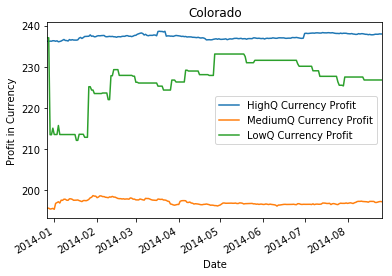

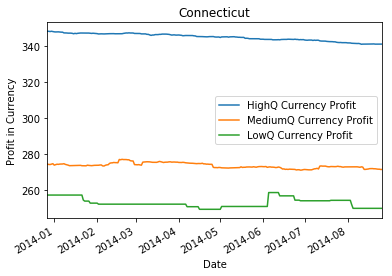

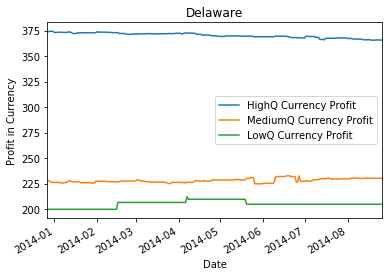

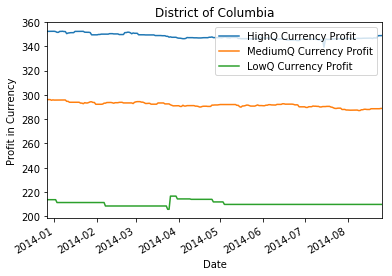

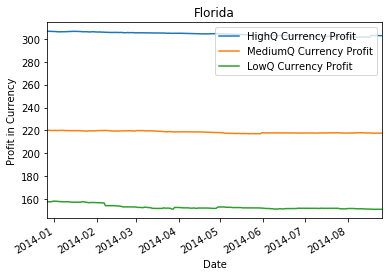

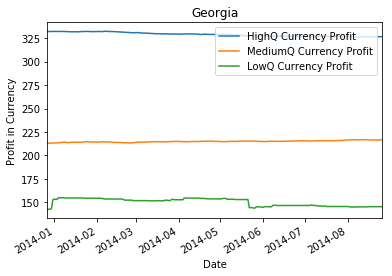

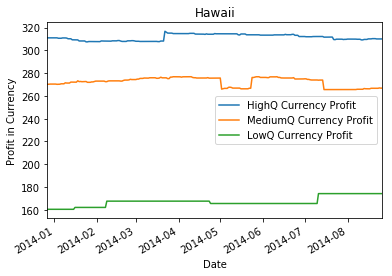

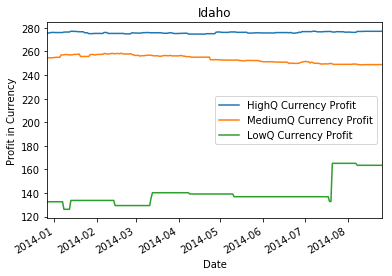

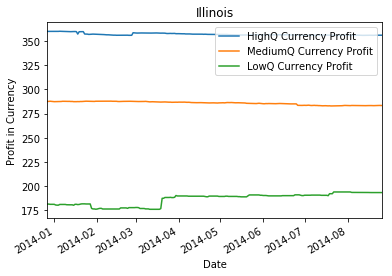

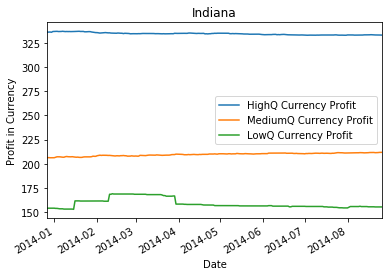

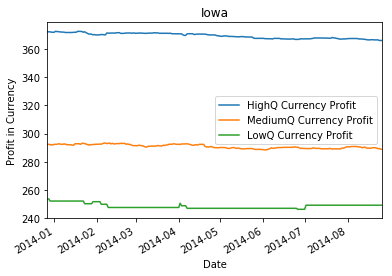

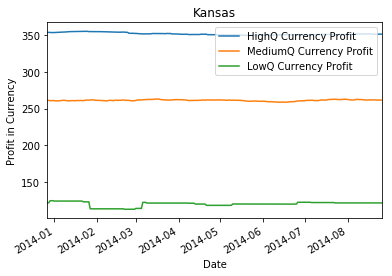

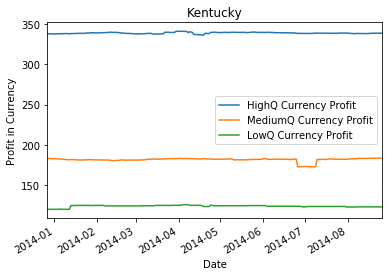

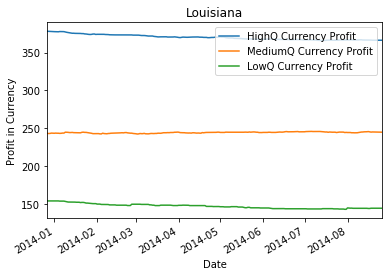

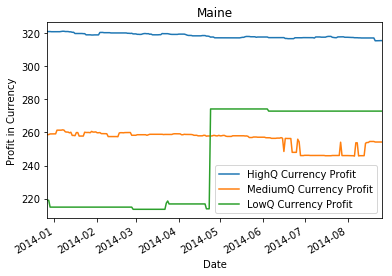

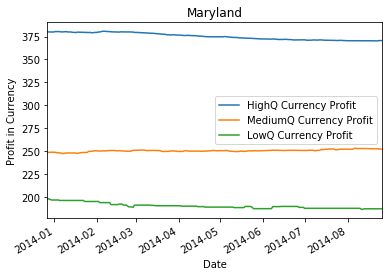

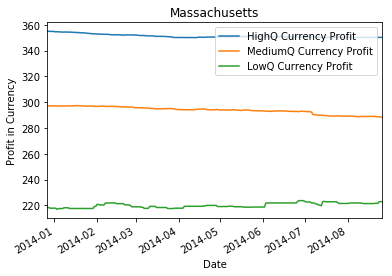

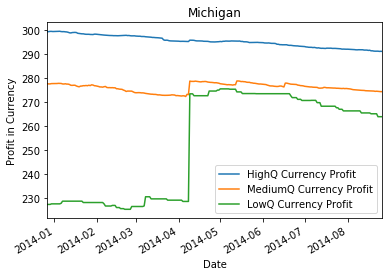

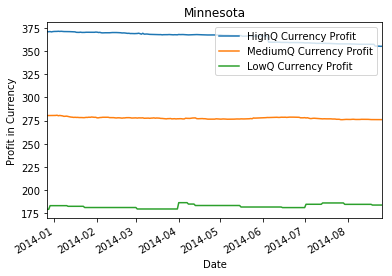

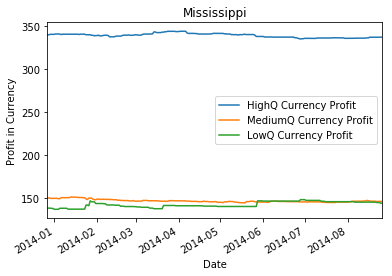

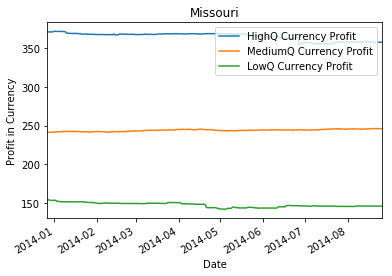

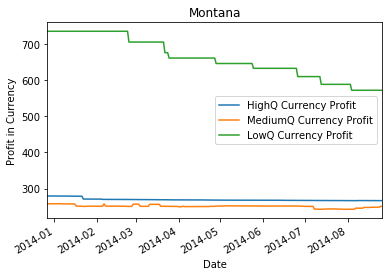

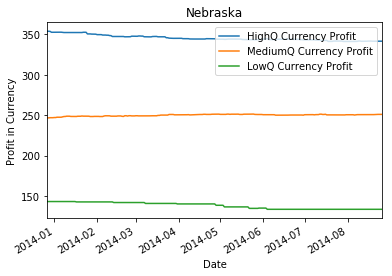

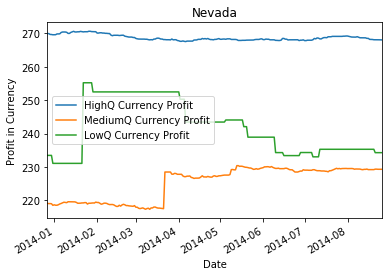

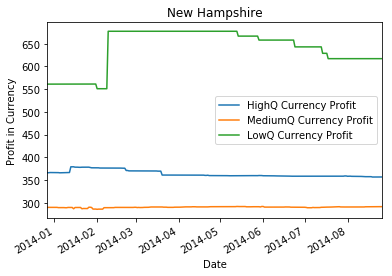

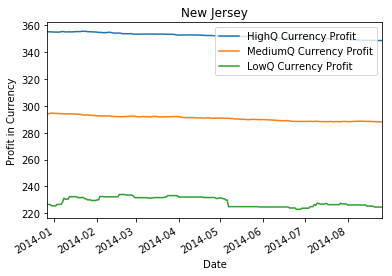

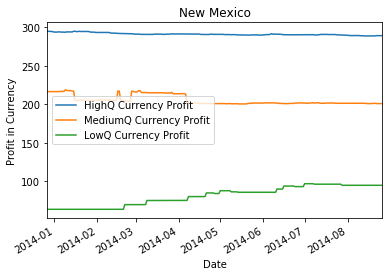

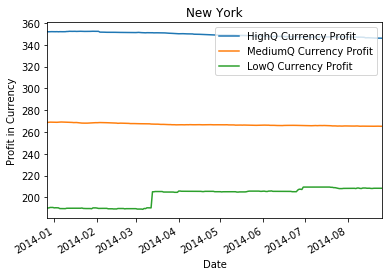

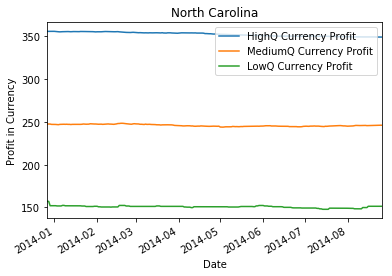

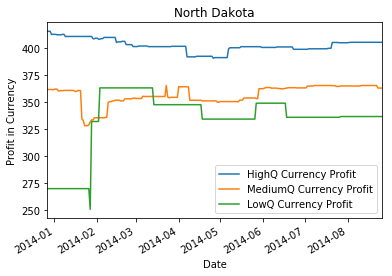

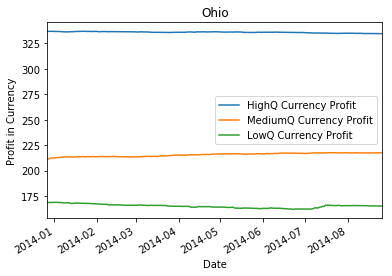

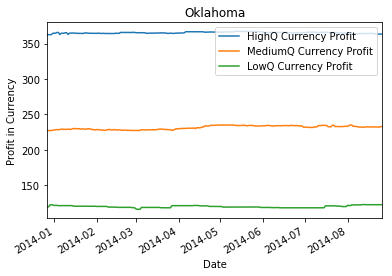

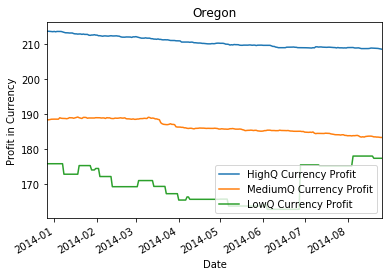

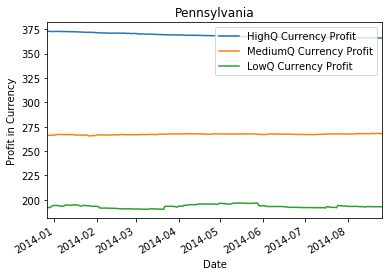

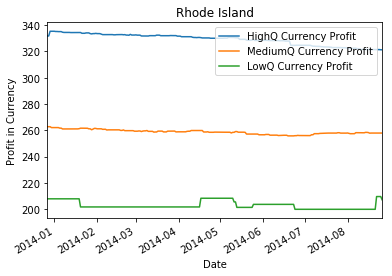

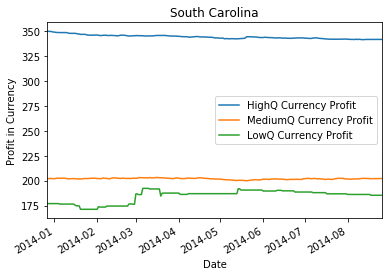

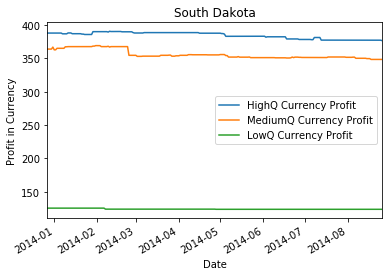

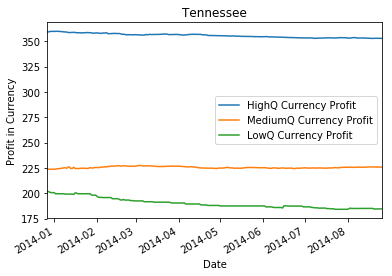

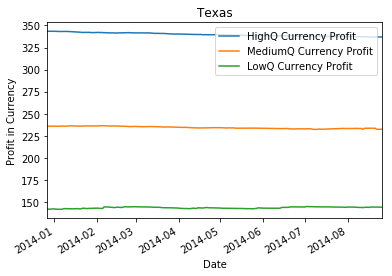

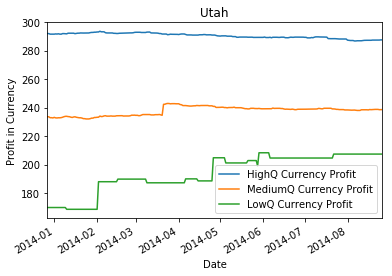

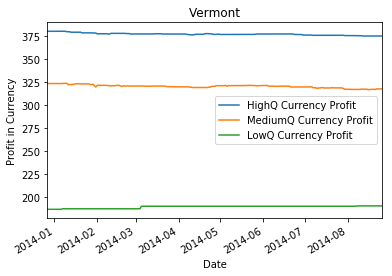

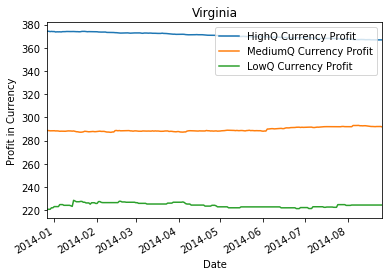

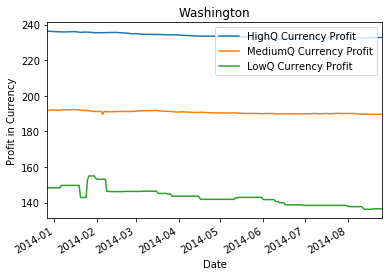

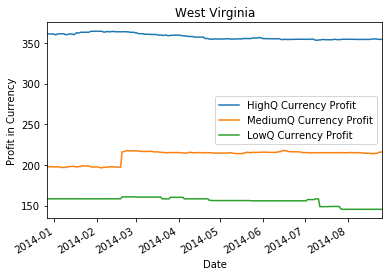

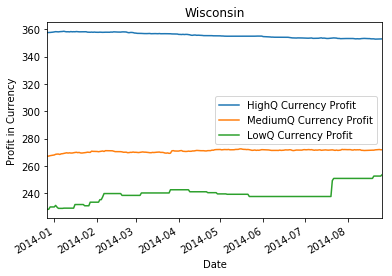

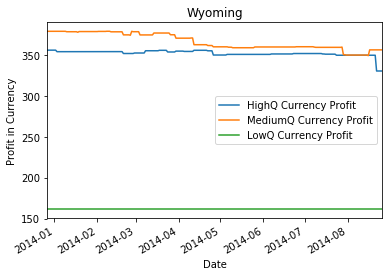

In [16]:
#data[data.State == 'California'].plot(x='Date', y=['HighQ Currency Profit','MediumQ Currency Profit','LowQ Currency Profit'])
#plt.show()
#Above is the "Idea" of what we are doing in each for loop below
#There will be a plot for each state showing currency profit over time per day

for i in range(len(states)):
    data[data.State == states[i]].plot(x='Date', y=['HighQ Currency Profit','MediumQ Currency Profit','LowQ Currency Profit'])
    plt.title(states[i])
    plt.ylabel('Profit in Currency')
    plt.show() 

# Marijuana Legalization Efforts: January 2014 - August 2014 <font color='black'></font>

- Based on our visual plot charts, we've found which states had reported the status of Legalized Marijuana:

Alabama: CBD trials
Alaska: Legalized for recreational use starting 2015
Arizona: N/A
Arkansas: N/A
California: N/A (already legalized)
Colorado: N/A
Connecticut: N/A
Delaware: N/A
DC: Decriminalized, legalized
Florida: CBD oil use passed, Medical marijuana use failed
Georgia: N/A
Hawaii: N/A
Idaho: N/A
Illinois: Legalization for medical use comes into effect
Indiana: N/A
Iowa: Decriminalization bill failed
Kansas: N/A
Kentucky: N/A
Louisiana: N/A
Maine: N/A
Maryland: Decriminalized
Massachusetts: N/A
Michigan: Most cities decriminalized/legalized
Minnesota: Medical use legalized, May
Mississippi: CBD oil legalized, April
Missouri: Possession decriminalized, CBD oil legalized, July
Montana: N/A 
Nebraska: N/A
Nevada: N/A 
New Hampshire: Legalization bill failed, January
New Jersey: N/A
New Mexico: N/A
New York: Legalized, July
North Carolina: Bill introduced but failed, May
North Dakota: N/A
Ohio: N/A
Oklahoma: N/A
Oregon: 2014 ballot measure passed for legalization in 2015 (observable effect)
Pennsylvania: N/A
Rhode Island: N/A
South Carolina: CBD oil legalized, June 
South Dakota: N/A
Tennessee: N/A
Texas: N/A
Utah: CBD oil legalized, March
Vermont: Decriminalized 2013
Virginia: N/A
Washington: Legalized 2012
West Virginia: Legalization bill failed, March
Wisconsin: CBD oil legalized, April
Wyoming: N/A



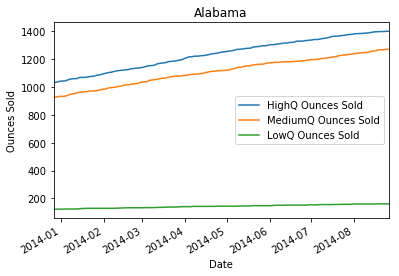

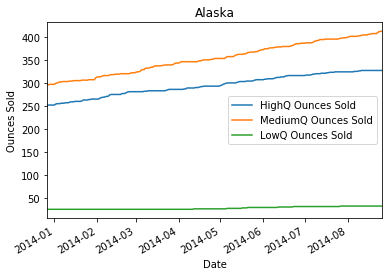

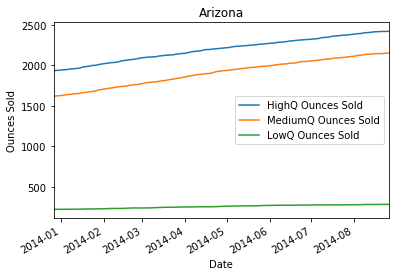

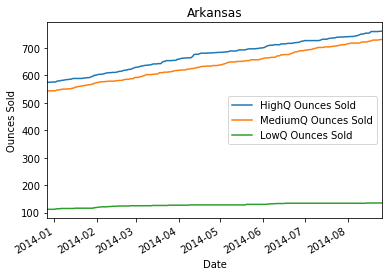

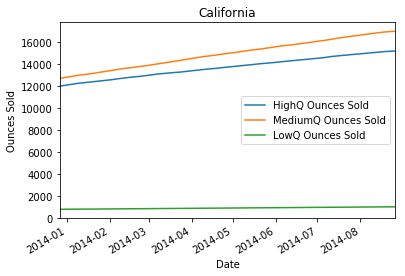

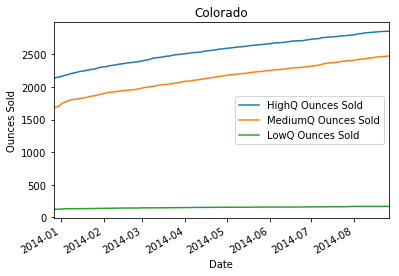

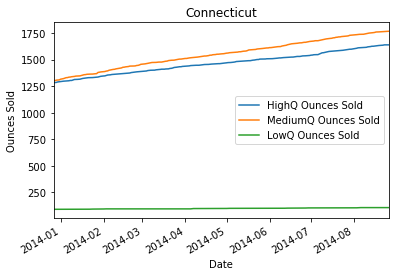

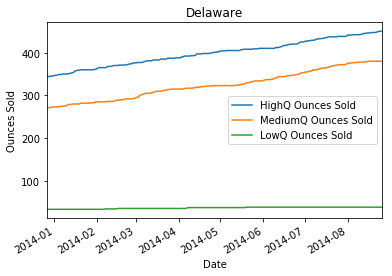

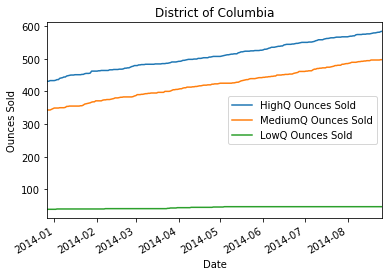

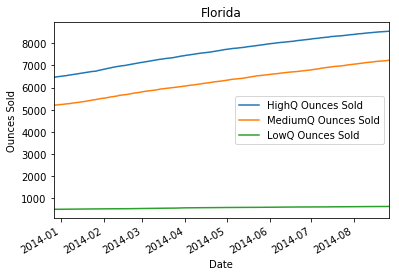

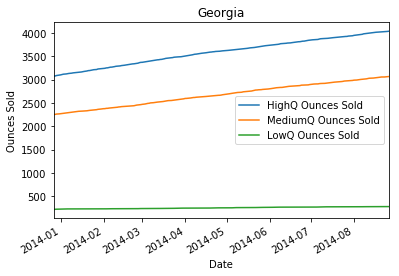

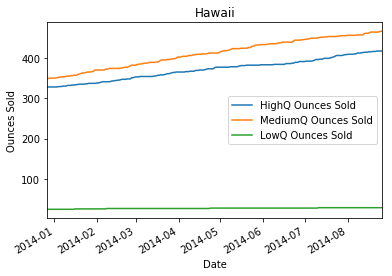

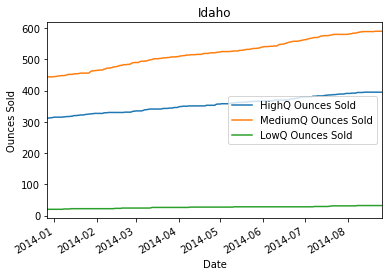

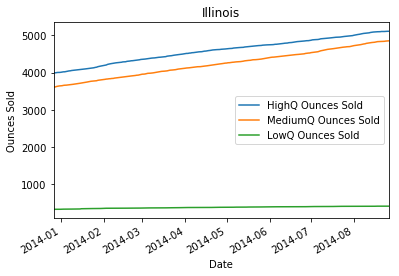

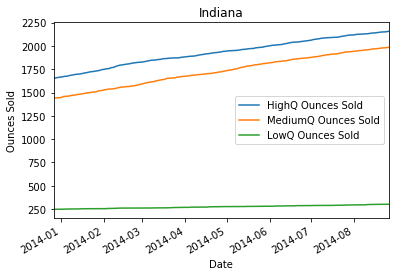

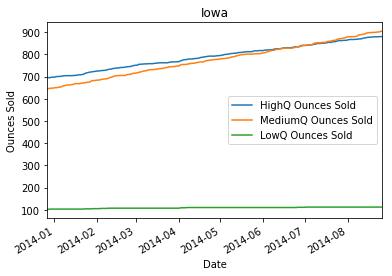

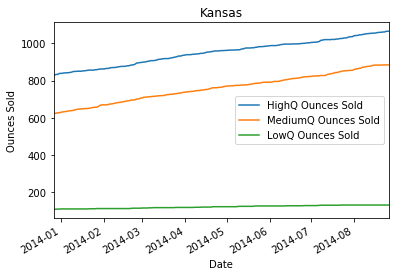

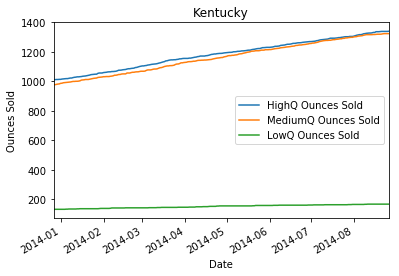

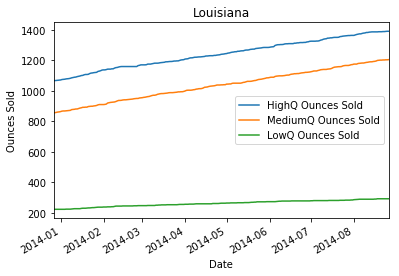

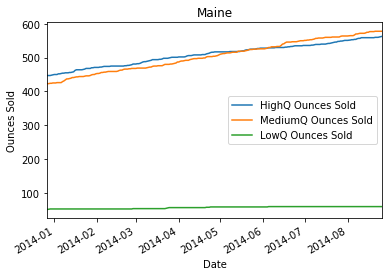

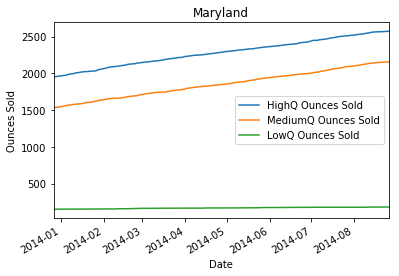

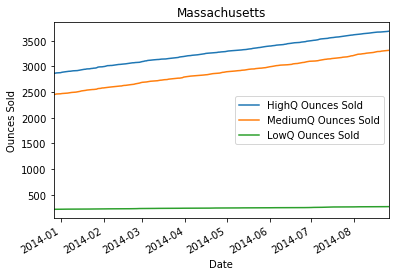

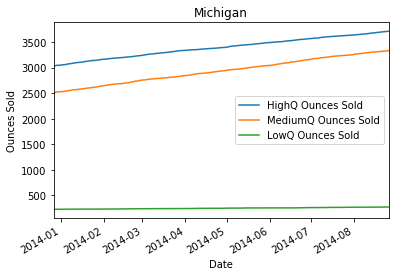

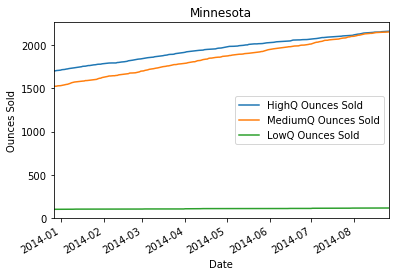

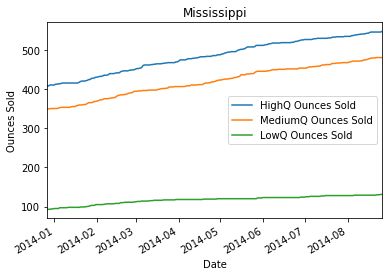

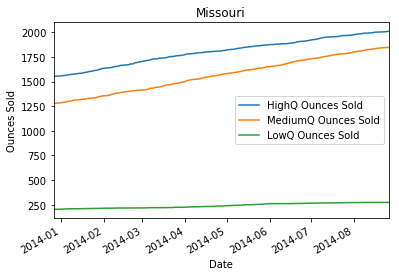

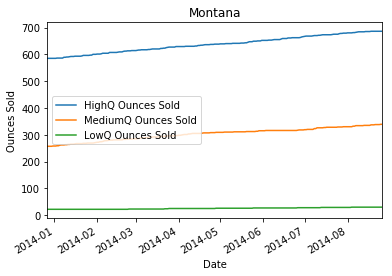

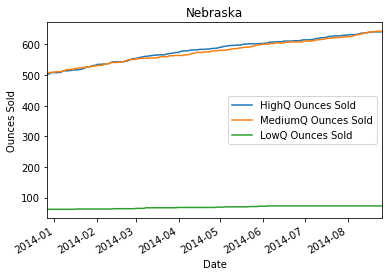

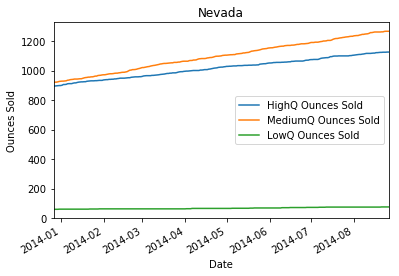

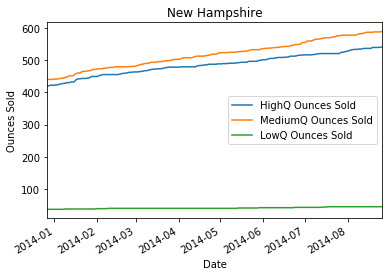

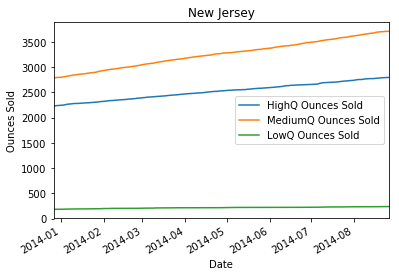

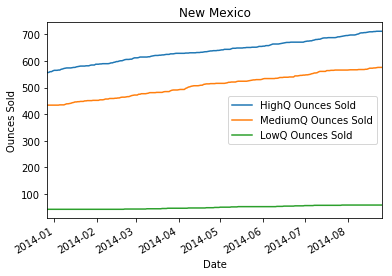

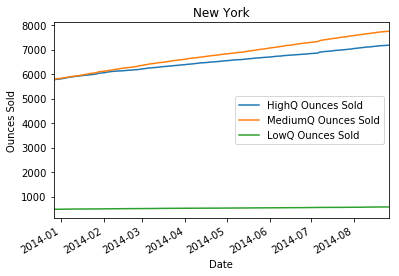

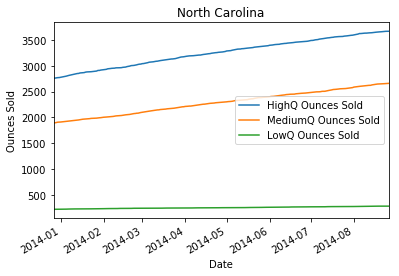

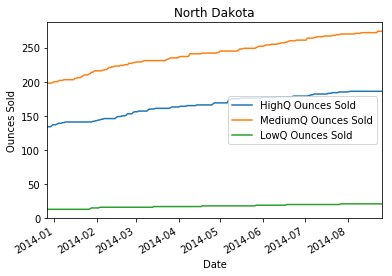

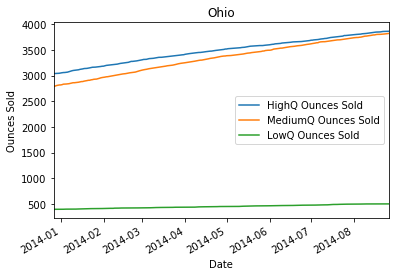

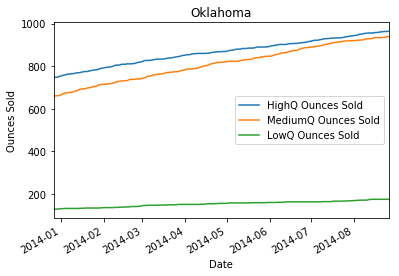

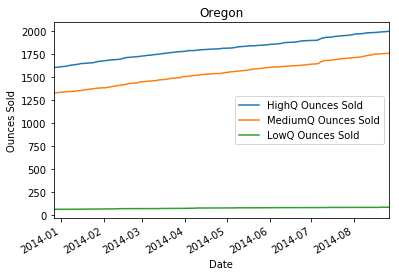

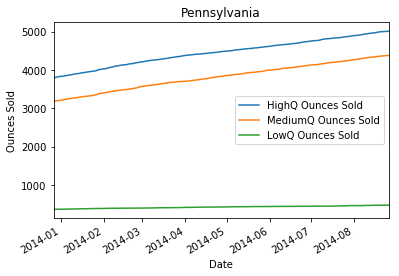

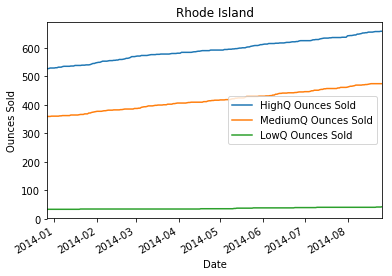

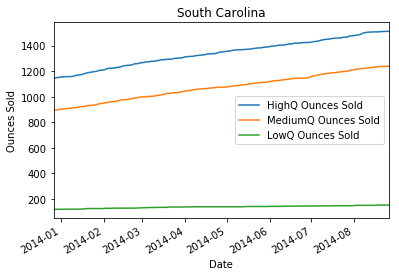

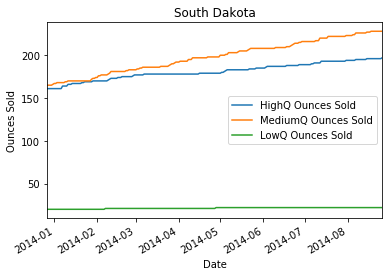

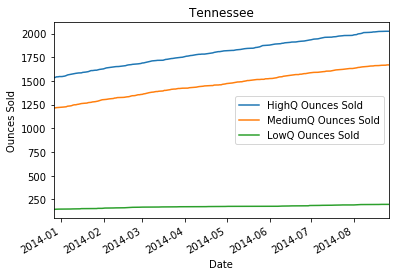

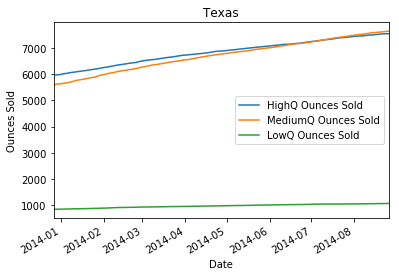

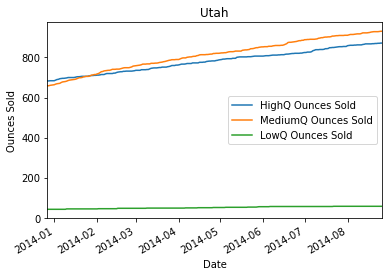

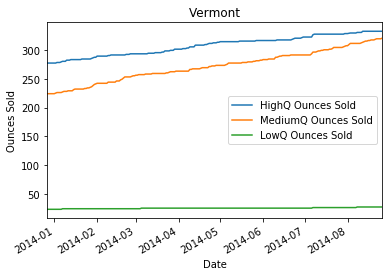

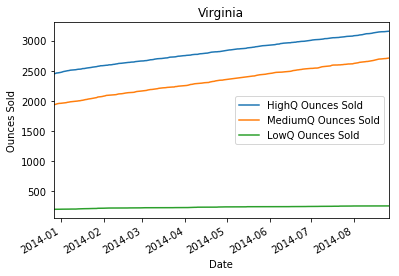

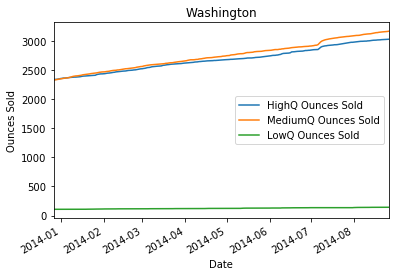

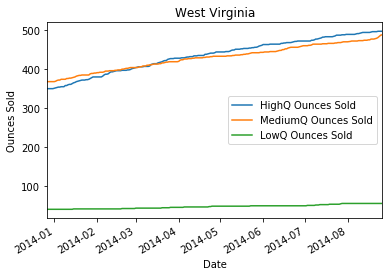

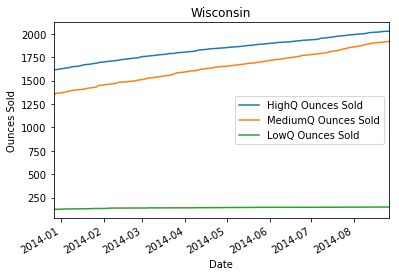

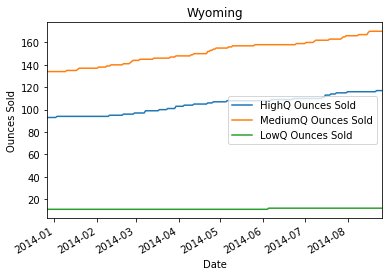

In [17]:
#There will be a plot for each state showing ounces sold over time per day

for i in range(len(states)):
    data[data.State == states[i]].plot(x='Date', y=['HighQ Ounces Sold','MediumQ Ounces Sold','LowQ Ounces Sold'])
    plt.title(states[i])
    plt.ylabel('Ounces Sold')
    plt.show()   

# Findings based on the data: <font color='black'></font>

Oregon was the only state with an observable effect of marijuana legislation on street prices. <font color='black'></font>


In [18]:
dataNation = data.drop( 'State', 1)
dataNation = dataNation.groupby("Date").sum()
dataNation.reset_index()

#Made a new dataframe for the national totals for each date to analyze the nation as a whole
#We had to groupby to get the totals of each date and organize it by the dates so we reset
#the index to keep date as a column

,Date,HighQ Currency Profit,HighQ Ounces Sold,MediumQ Currency Profit,MediumQ Ounces Sold,LowQ Currency Profit,LowQ Ounces Sold
0,2013-12-27,17110.40,91611,12691.75,82627,10229.48,8286
1,2013-12-28,17110.24,91627,12691.30,82652,10229.67,8287
2,2013-12-29,17114.73,91804,12691.52,82869,10206.00,8309
3,2013-12-30,17110.00,91894,12691.60,82977,10207.67,8321
4,2013-12-31,17110.76,92000,12693.83,83084,10217.82,8330
5,2014-01-01,17109.23,92106,12691.96,83199,10214.59,8346
6,2014-01-02,17109.40,92274,12693.89,83355,10212.97,8357
7,2014-01-03,17107.08,92426,12702.04,83519,10205.69,8374
8,2014-01-04,17106.63,92542,12700.46,83645,10208.40,8386
9,2014-01-05,17103.88,92671,12701.43,83780,10215.70,8405


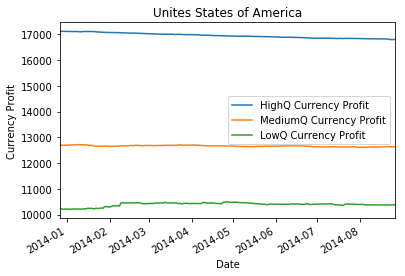

In [19]:
dataNation.plot( y=['HighQ Currency Profit','MediumQ Currency Profit','LowQ Currency Profit'])
plt.title('Unites States of America')
plt.ylabel('Currency Profit')
plt.show()

#Here we can take a look at the National trend over this time period for profit

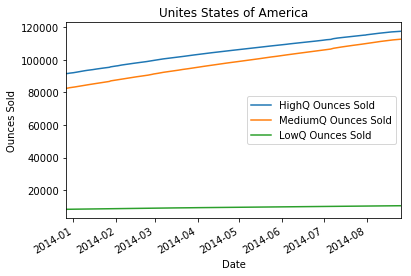

In [20]:
dataNation.plot(y=['HighQ Ounces Sold','MediumQ Ounces Sold','LowQ Ounces Sold'])
plt.title('Unites States of America')
plt.ylabel('Ounces Sold')
plt.show()

#Here we can take a look at the National trend over this time period for ounces sold

In [2]:
# Conclusions

In [3]:
From the national averages it seems that marijuana street prices as a whole across the United States went down over the period of January through August 2014. However a strong conclusion is hard to make based off this data, because the only state with a clear observable decrease in street prices after legalization efforts occurred was Oregon. Another future iteration of this project might be able to take a closer look and gather data from other sources to better guess at correlation between street prices and marijuana legal status.

SyntaxError: invalid syntax (<ipython-input-3-2a480e94014e>, line 1)

# Data Issues: <font color='black'></font>

# Collection Methodology <font color='black'></font>

- The original data set doesn’t clarify the definition of ‘street price’ so the data may or may not include dispensary prices- which are usually more expensive than illegally sold marijuana.
- The averaged street price per state does not take into account variation by region, which would be important in considering cases where cities passed decriminalization laws before the state did.



# Analysis <font color='black'></font>

- Eight months is a relatively short timeframe and arguably is not long enough to make strong conclusions on the long term effects of marijuana legislature on market prices for weed.
- Legalization/decriminalization efforts occurring before or during the scope of our timeframe may have had a delayed effect on prices and so wouldn’t be clearly reflected in the data.
- Many graphs have odd fluctuations and sharp price increase/decreases that can’t solely be explained by legalization actions in that state. In addition some price changes occurred for one or more qualities of weed while others remained unchanged, or one got more expensive while one got cheaper.
- A possible inconsistency we found was for the recorded profit values for Alaska, Colorado, Montana, Nevada, New Hampshire and Wyoming- data corresponding to the different qualities of weed sold appeared to have been switched.


# Outside Factors: <font color='black'></font>

Other factors exist that could possibly explain the fluctuations of marijuana prices in our data, such as supply surplus and shortages, and police crackdowns. 
